<a href="https://colab.research.google.com/github/YASHGUPTA2611/House-Prices---Advanced-Regression-Techniques/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
train = pd.read_csv('/content/train.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.shape

(1460, 81)

In [ ]:
# checking for duplicate rows.
print('Number of duplicated values in dataset: ', train.duplicated().sum())

Number of duplicated values in dataset:  0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Removing null values**

In [ ]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

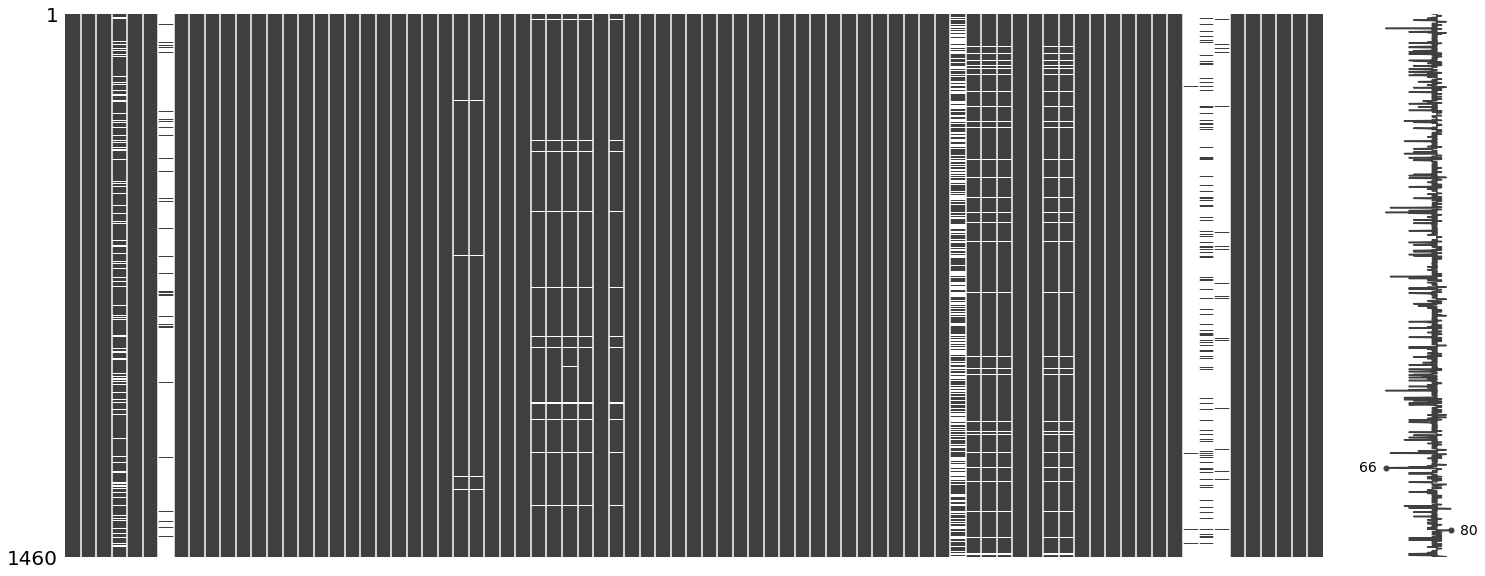

In [ ]:
#Visualization of null values
ms.matrix(train) 

## white gaps are the null values

In [ ]:
train_null_counts = train.isnull().sum()

In [ ]:
cols_to_drop = train_null_counts[train_null_counts > 100].index

In [ ]:
cols_to_drop

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
train_new = train.drop(cols_to_drop, axis=1)

In [ ]:
train_new.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [ ]:
train_new['Age'] = train_new['YrSold'] - train_new['YearBuilt']
train_new['Remodeled'] = (train_new['YearRemodAdd'] != train_new['YearBuilt']).astype(int)
train_new['TotalBath'] = train_new['FullBath'] + train_new['HalfBath'] + train_new['BsmtFullBath'] + train_new['BsmtHalfBath']
train_new['TotalSF'] = train_new['1stFlrSF'] + train_new['2ndFlrSF'] + train_new['TotalBsmtSF']


## Analyzing numeric data

In [ ]:
train_numeric=  train_new.select_dtypes(include='int64')

In [ ]:
# Null values in  numeric data
train_numeric.isnull().sum()

# As we can see that there are no null values in numeric data.
# So No Problem

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
Age              0
Remodeled        0
TotalBath        0
TotalSF          0
dtype: int64

In [ ]:
train_numeric.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,Remodeled,TotalBath,TotalSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,36.547945,0.476712,2.430822,2567.048630
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,30.250152,0.499629,0.922647,821.714421
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,1.000000,334.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,8.000000,0.000000,2.000000,2009.500000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,35.000000,0.000000,2.000000,2474.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,54.000000,1.000000,3.000000,3004.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,136.000000,1.000000,6.000000,11752.000000


#**Checking for outliers**

In [ ]:
train_numeric['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


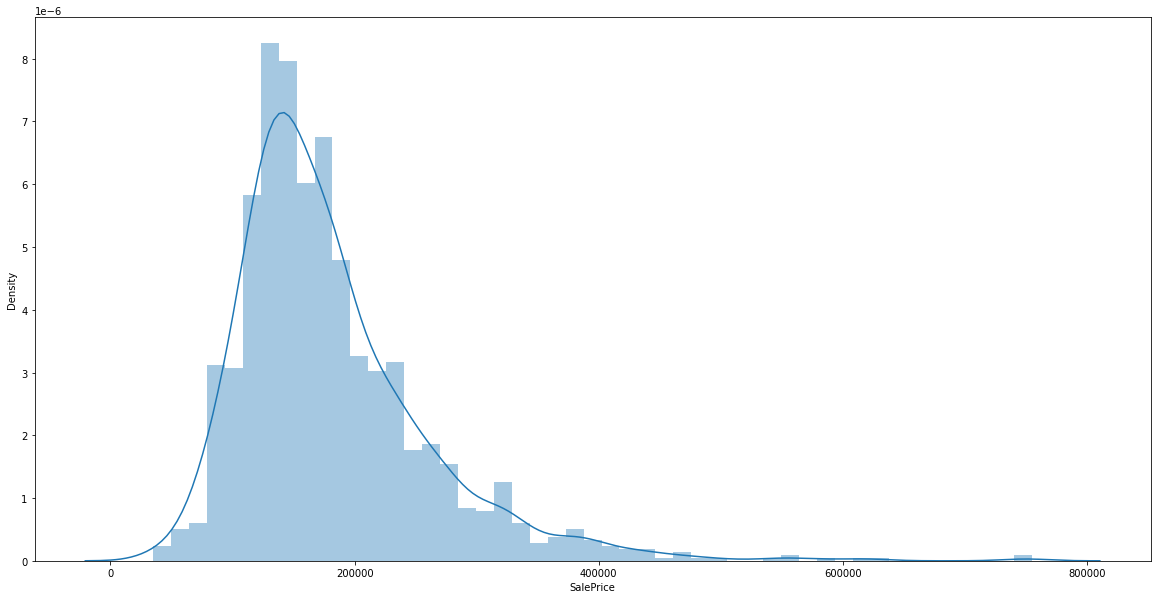

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.distplot(train_numeric['SalePrice'])

In [ ]:
def outliers(data):
  q75, q25 = np.percentile(data, [75 ,25])
  IQR = q75 - q25
  lower_outliers  = q25 -1.5*IQR
  upper_outliers  =q75 + 1.5*IQR
  return lower_outliers, upper_outliers

In [ ]:
lower_outliers_range, upper_outliers_range = outliers(train_new['SalePrice'])

In [ ]:
print('No. of Lower outliers :', len(train[train['SalePrice']<lower_outliers_range]))

No. of Lower outliers : 0


In [ ]:
print('No. of Lower outliers :', len(train[train['SalePrice']>upper_outliers_range]))

No. of Lower outliers : 61


In [ ]:
index_to_remove = train[train['SalePrice']>upper_outliers_range].index

In [ ]:
train_new2 = train_new.drop(index_to_remove)

In [ ]:
train_new2.shape

(1399, 79)

#**Feature Selection**

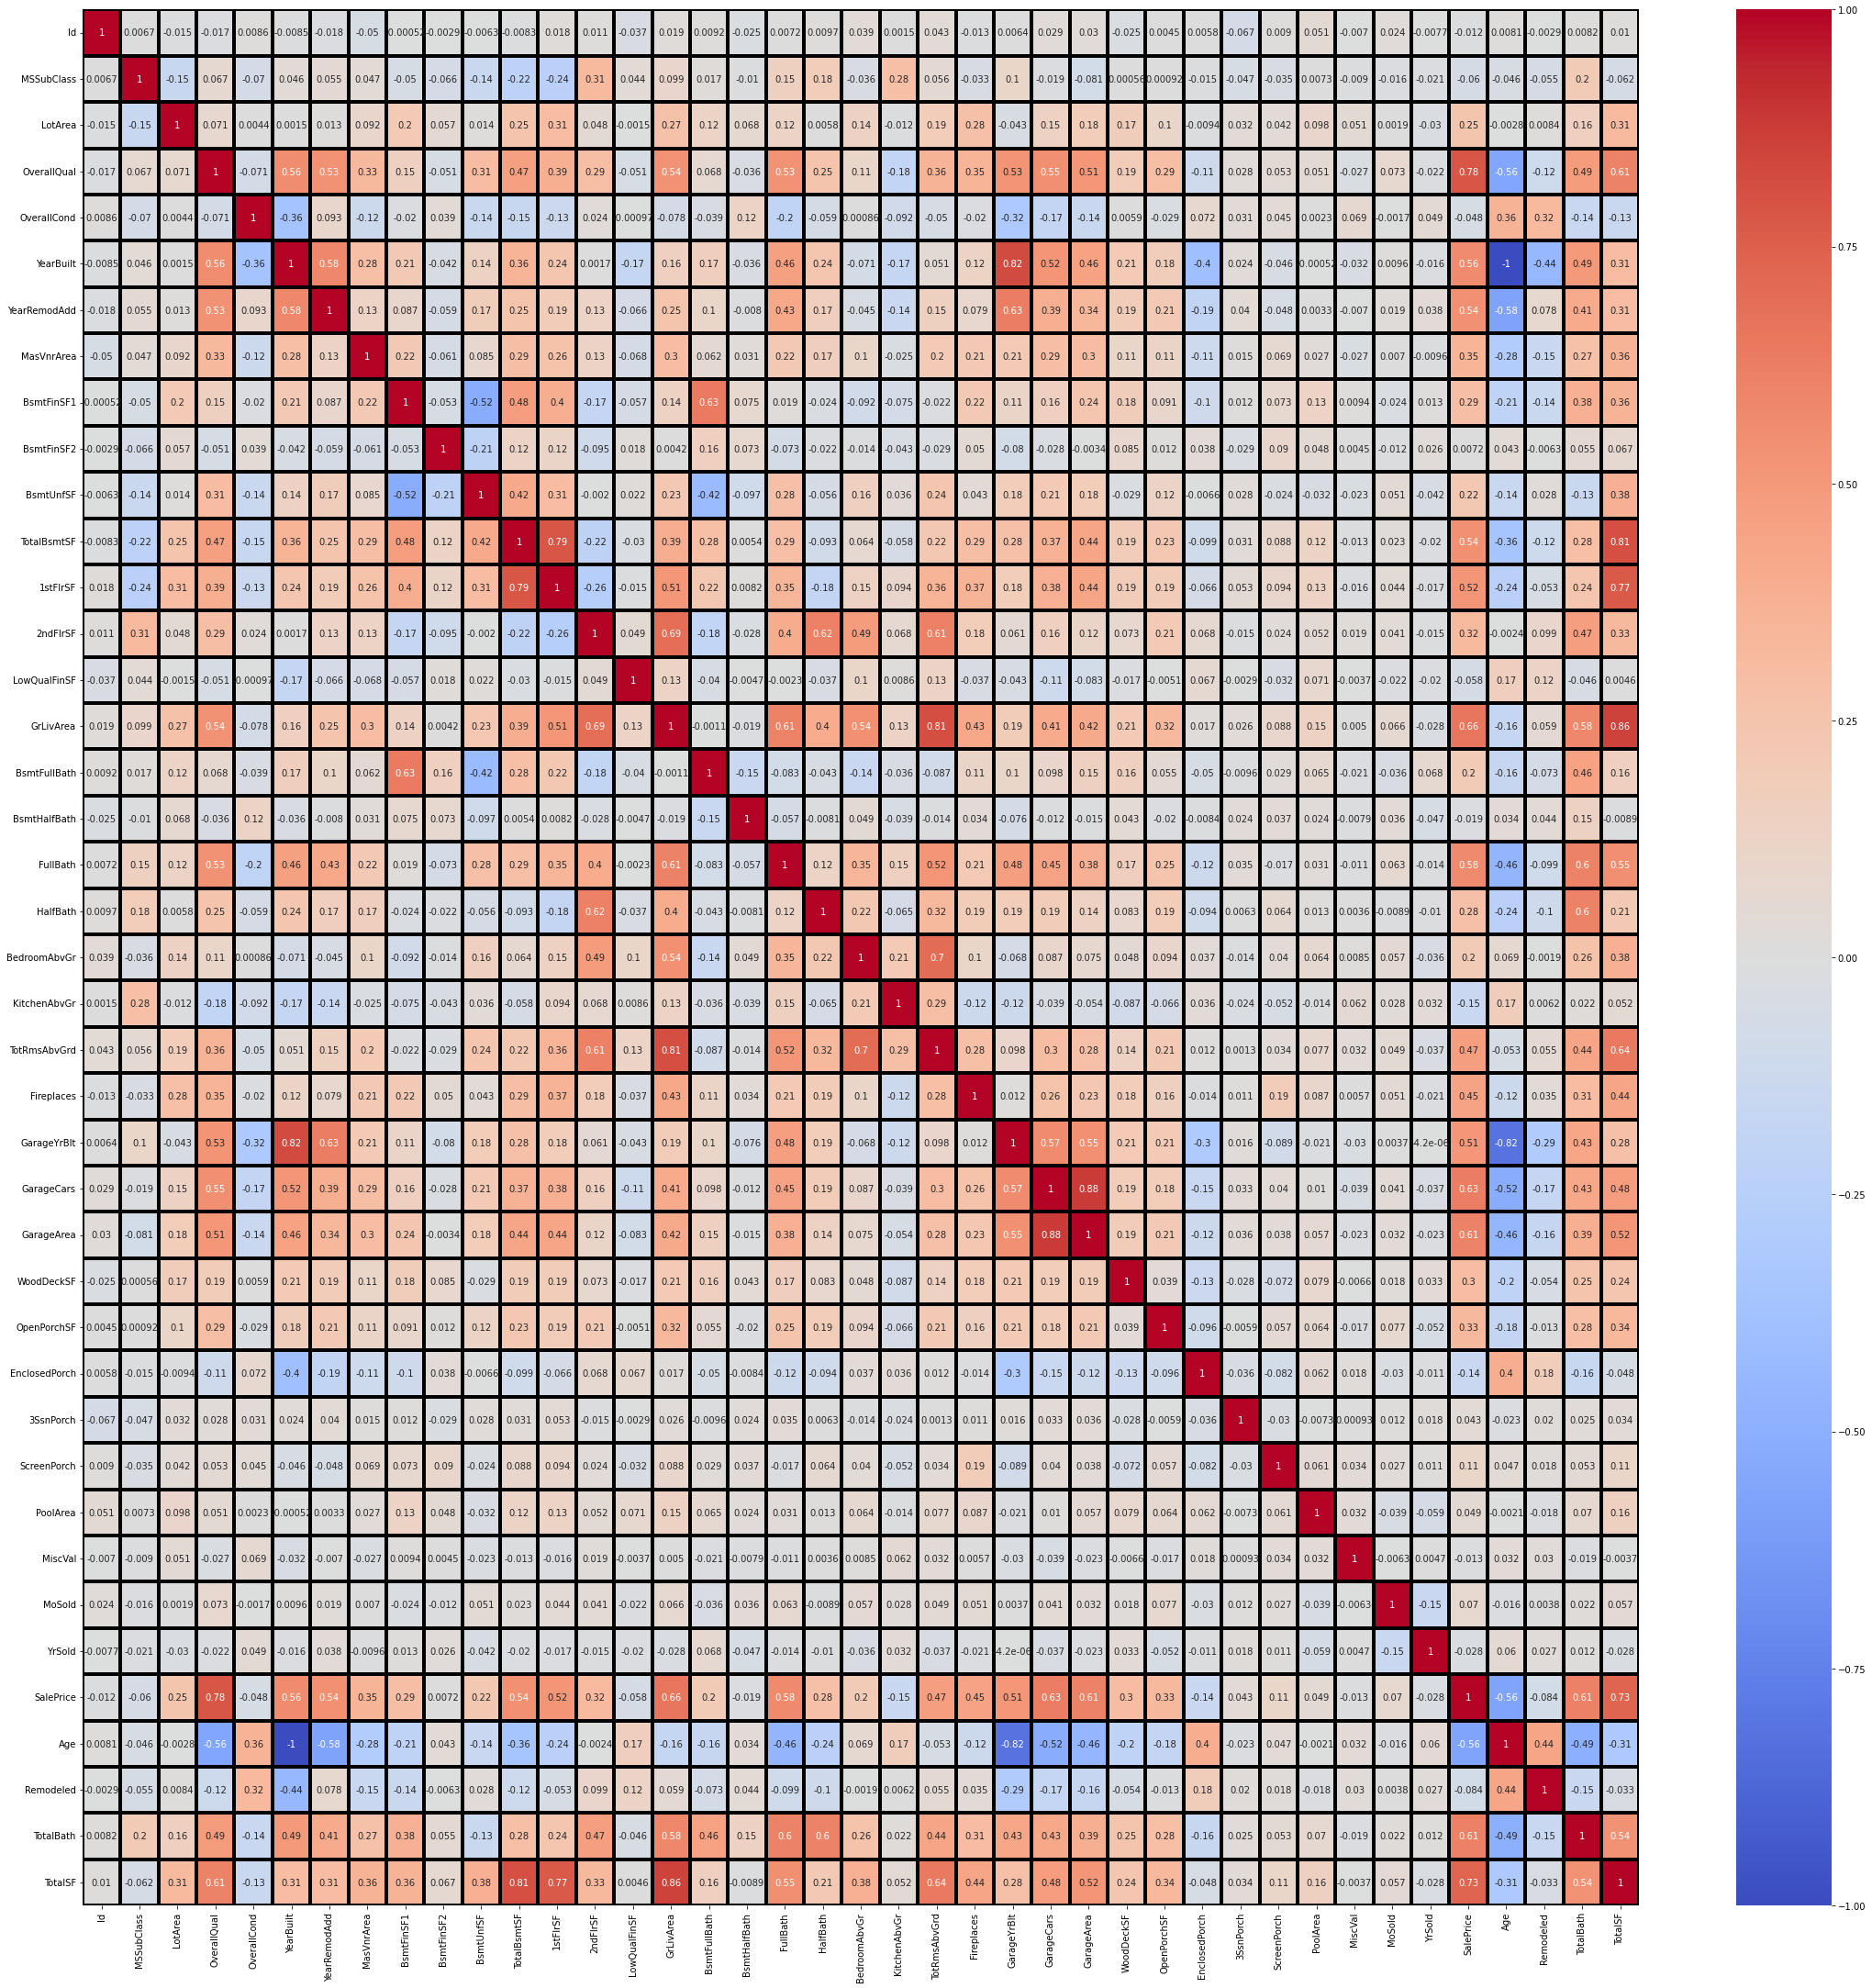

In [ ]:
"""correlation matrix between numerical cols in the dataset."""
fig, ax = plt.subplots(figsize=(38,38))
coer = train_new2.corr()         
sns.heatmap(coer, annot = True, ax=ax, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [ ]:
coer

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,Remodeled,TotalBath,TotalSF
Id,1.000000,0.006703,-0.015152,-0.016500,0.008625,-0.008484,-0.017613,-0.050156,-0.000520,-0.002935,-0.006280,-0.008345,0.017611,0.010839,-0.037039,0.018956,0.009237,-0.025411,0.007203,0.009662,0.038704,0.001470,0.042886,-0.012819,0.006391,0.029471,0.029600,-0.024522,0.004464,0.005792,-0.067449,0.008969,0.050732,-0.006998,0.023635,-0.007731,-0.011984,0.008128,-0.002888,0.008177,0.010087
MSSubClass,0.006703,1.000000,-0.149714,0.066951,-0.070420,0.045599,0.055086,0.046659,-0.050465,-0.066088,-0.137873,-0.224965,-0.240781,0.312578,0.043961,0.099421,0.017438,-0.010330,0.148676,0.182521,-0.036175,0.281714,0.056035,-0.033322,0.103976,-0.018590,-0.081461,0.000562,0.000916,-0.014835,-0.047040,-0.034634,0.007317,-0.008994,-0.016176,-0.020555,-0.060111,-0.046431,-0.055363,0.198063,-0.061987
LotArea,-0.015152,-0.149714,1.000000,0.070548,0.004398,0.001485,0.012715,0.091583,0.203555,0.057139,0.014446,0.252314,0.307689,0.047520,-0.001544,0.270307,0.120442,0.067959,0.120896,0.005780,0.142965,-0.012410,0.186235,0.280514,-0.043025,0.147864,0.183981,0.174801,0.102608,-0.009359,0.031653,0.042003,0.098440,0.050528,0.001886,-0.030297,0.249812,-0.002821,0.008445,0.162967,0.314421
OverallQual,-0.016500,0.066951,0.070548,1.000000,-0.071040,0.561141,0.532226,0.326875,0.151949,-0.050548,0.309623,0.466350,0.388258,0.289944,-0.050663,0.537984,0.067658,-0.036230,0.533141,0.251353,0.107147,-0.183279,0.360247,0.351776,0.526463,0.547900,0.508712,0.193101,0.289312,-0.106235,0.028345,0.053373,0.051284,-0.026519,0.073287,-0.022327,0.784294,-0.561193,-0.115253,0.488512,0.609119
OverallCond,0.008625,-0.070420,0.004398,-0.071040,1.000000,-0.361703,0.093423,-0.118078,-0.019725,0.039380,-0.139107,-0.151769,-0.132360,0.023791,-0.000974,-0.077649,-0.038908,0.118188,-0.198730,-0.059058,0.000864,-0.091588,-0.049539,-0.019609,-0.316001,-0.174249,-0.140179,0.005899,-0.029149,0.071991,0.031476,0.045221,0.002255,0.068666,-0.001734,0.049124,-0.048005,0.363270,0.316982,-0.142511,-0.133843
YearBuilt,-0.008484,0.045599,0.001485,0.561141,-0.361703,1.000000,0.579099,0.283671,0.211784,-0.042351,0.141662,0.355419,0.240259,0.001734,-0.170855,0.163352,0.166577,-0.035965,0.461483,0.236795,-0.070626,-0.171344,0.051289,0.123635,0.821200,0.516558,0.457406,0.205739,0.176118,-0.396656,0.024273,-0.046176,-0.000523,-0.031812,0.009607,-0.015630,0.564558,-0.999024,-0.440320,0.494314,0.312497
YearRemodAdd,-0.017613,0.055086,0.012715,0.532226,0.093423,0.579099,1.000000,0.129405,0.086505,-0.058630,0.174562,0.251765,0.194085,0.132715,-0.065626,0.254245,0.102583,-0.008017,0.426281,0.169309,-0.044826,-0.144409,0.148989,0.079410,0.628051,0.387651,0.338156,0.188299,0.211389,-0.191040,0.040081,-0.048242,0.003326,-0.007001,0.018855,0.038480,0.541161,-0.576434,0.077610,0.406381,0.307783
MasVnrArea,-0.050156,0.046659,0.091583,0.326875,-0.118078,0.283671,0.129405,1.000000,0.215738,-0.061349,0.085235,0.292281,0.264480,0.126735,-0.068254,0.300353,0.061900,0.030536,0.218353,0.169714,0.103150,-0.025435,0.203311,0.214395,0.207710,0.293337,0.299026,0.105419,0.113718,-0.113935,0.015058,0.069086,0.026837,-0.026966,0.007018,-0.009640,0.352794,-0.283598,-0.147088,0.269291,0.360333
BsmtFinSF1,-0.000520,-0.050465,0.203555,0.151949,-0.019725,0.211784,0.086505,0.215738,1.000000,-0.052980,-0.520300,0.482465,0.395753,-0.167881,-0.057332,0.141392,0.634381,0.074970,0.019448,-0.024232,-0.091932,-0.074909,-0.021848,0.216641,0.109721,0.158081,0.237109,0.178227,0.090669,-0.102079,0.011991,0.073321,0.127790,0.009389,-0.024259,0.013183,0.290377,-0.210848,-0.135454,0.382242,0.360862
BsmtFinSF2,-0.002935,-0.066088

# Taken the columns whose coer value is : |coer|<1 (less than mod 1)

###columns to drop : YrSold, MoSold, MiscVal, PoolArea, 3SsnPorch, BsmtHalfBath, LowQualFinSF, BsmtFinSF2,Id

### First we will se if these columns are making any sense by plotting.

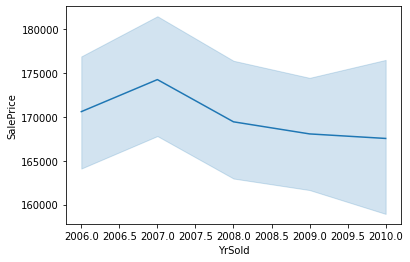

In [ ]:
sns.lineplot(data = train_new2, y = 'SalePrice', x='YrSold')

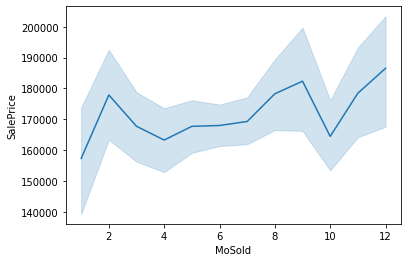

In [ ]:
sns.lineplot(data = train_new2, y = 'SalePrice', x='MoSold')

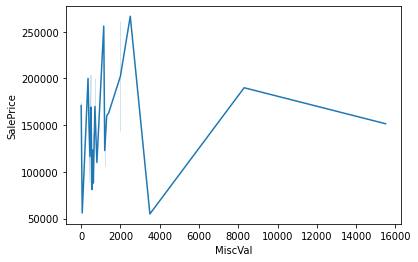

In [ ]:
sns.lineplot(data = train_new2, y = 'SalePrice', x='MiscVal')

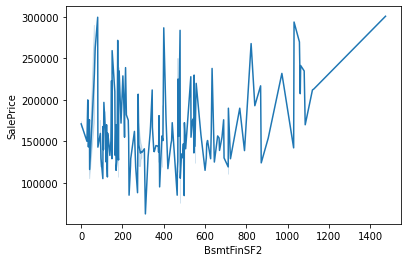

In [ ]:
sns.lineplot(data = train_new2, y = 'SalePrice', x='BsmtFinSF2')

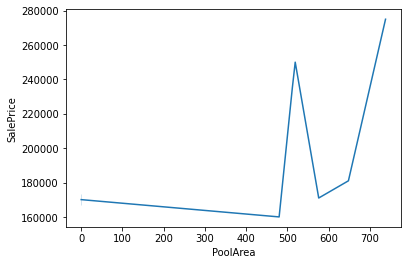

In [ ]:
sns.lineplot(data = train_new2, y = 'SalePrice', x='PoolArea')

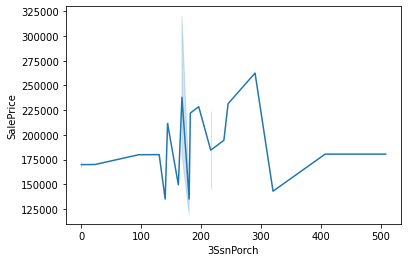

In [ ]:
sns.lineplot(data = train_new2, y = 'SalePrice', x='3SsnPorch')


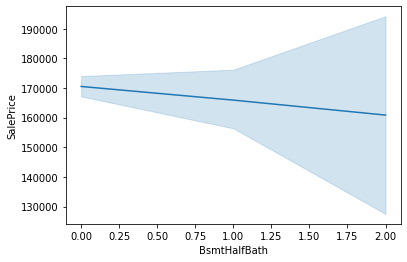

In [ ]:
sns.lineplot(data = train_new2, y = 'SalePrice', x='BsmtHalfBath')

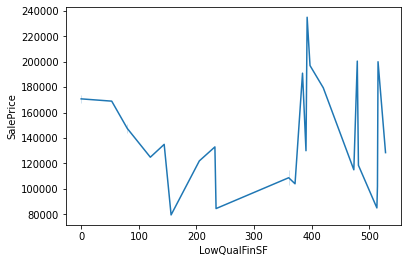

In [ ]:
sns.lineplot(data = train_new2, y = 'SalePrice', x='LowQualFinSF')

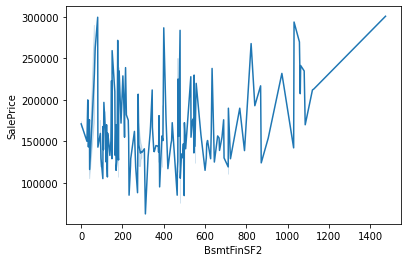

In [ ]:
sns.lineplot(data = train_new2, y = 'SalePrice', x='BsmtFinSF2')

### As we can see that columns other than Yearsold and Monthsold are not making any sense, so we will drop these columns

In [ ]:
col_drops = ['Id', 'MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'ScreenPorch', 'PoolArea','YrSold'] ## cols to drop 
train_new2.drop(col_drops,axis=1,inplace=True)

In [ ]:
train_new2.shape

(1399, 69)

## Analyzing categorical data

In [ ]:
train_categorical= train_new2.select_dtypes(exclude=['int', 'float64'])

In [ ]:
train_categorical

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [ ]:
categorical_cols = train_categorical.columns

In [ ]:
for i, x in enumerate(categorical_cols):  ## print all unique values in categorical columns
    print(x, train_new2[x].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NAmes' 'SawyerW' 'NridgHt' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'ClearCr' 'NPkVill' 'StoneBr'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'WdShngl' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

### Filling null values of categorical data

In [ ]:
train_new2.fillna(train_new2.mode().iloc[0], inplace=True)

In [ ]:
train_new2.isnull().sum()

MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish

In [ ]:
train_new2.columns

Index(['MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'Age

In [ ]:
train_new2.shape

(1399, 69)

## Encoding categorical data

## Before standard scaling we have to concat our train and test data together and then perform standard scaling otherwise sometimes pd.dummies function gives different encoding of columns


### First we clean our test data before doing any prediction

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
test.shape

(1459, 80)

In [ ]:
## Checking null rows in test data
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

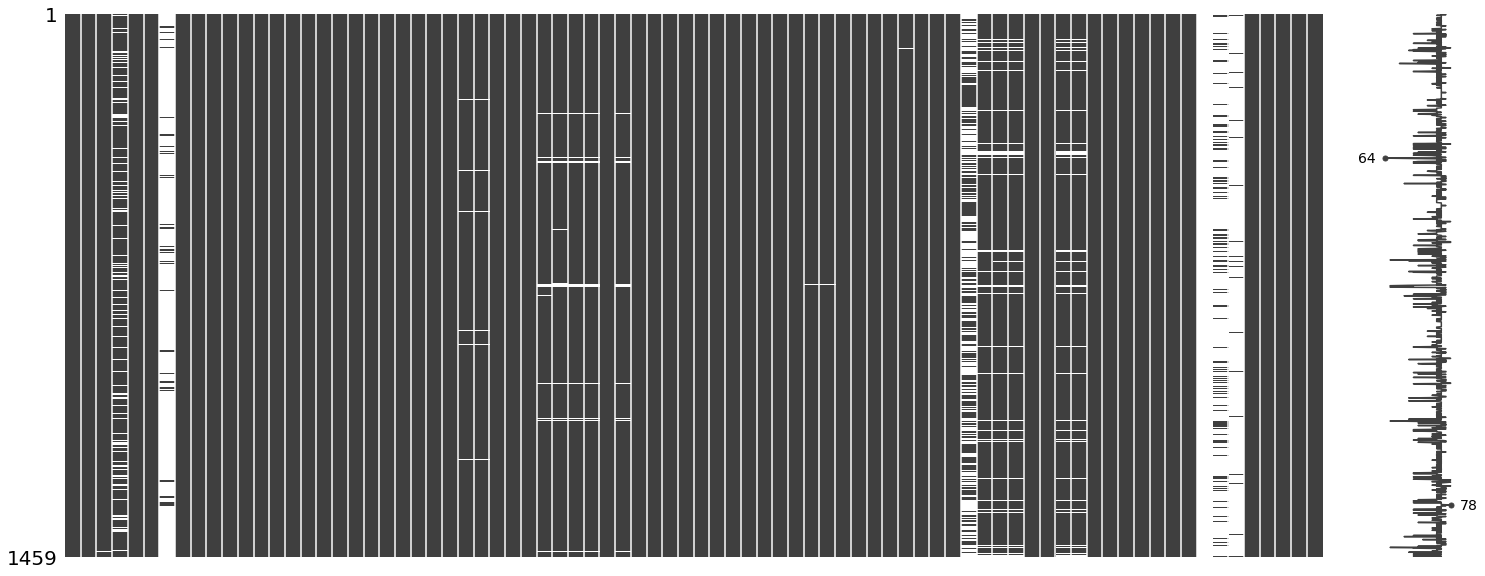

In [ ]:
ms.matrix(test)

In [ ]:
test_null_counts = test.isnull().sum()
cols_to_drop_test = test_null_counts[test_null_counts > 100].index
cols_to_drop_test

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
test_new = test.drop(cols_to_drop_test, axis=1)

In [ ]:
test_new.isnull().sum()

Id                0
MSSubClass        0
MSZoning          4
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [ ]:
test_new['Age'] = test_new['YrSold'] - test_new['YearBuilt']
test_new['Remodeled'] = (test_new['YearRemodAdd'] != test_new['YearBuilt']).astype(int)
test_new['TotalBath'] = test_new['FullBath'] + test_new['HalfBath'] + test_new['BsmtFullBath'] + test_new['BsmtHalfBath']
test_new['TotalSF'] = test_new['1stFlrSF'] + test_new['2ndFlrSF'] + test_new['TotalBsmtSF']

In [ ]:
col_drops = ['Id', 'MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'ScreenPorch', 'PoolArea','YrSold'] ## cols to drop 
test_new.drop(col_drops,axis=1,inplace=True)

In [ ]:
test_new.fillna(test_new.mode().iloc[0], inplace=True)

In [ ]:
test_new.isnull().sum()

MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish

### Now concating test and train data for 

In [ ]:
len_train_data = len(train_new2)

In [ ]:
dataset = pd.concat(objs=[train_new2, test_new], axis=0)
dataset = pd.get_dummies(dataset)

In [ ]:
train_categorical = dataset[:len_train_data]

In [ ]:
test_categorical = dataset[len_train_data:]

## Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train_Categorical_col = train_categorical.columns

In [ ]:
scaler = StandardScaler()
data2 = pd.DataFrame(scaler.fit_transform(train_categorical),columns = train_Categorical_col)
data2

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,Age,Remodeled,TotalBath,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleT

In [ ]:
features = data2.drop('SalePrice', axis=1)
target = data2['SalePrice']

In [ ]:
## TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.3,random_state=5)

## Trying Different models

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Make predictions on test data
Y_pred = lr1.predict(X_test)

# Evaluate performance of the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 5.295236103508202e+21
R2 Score: -5.351475695630812e+21


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=13)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best R2 Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 500}
Best R2 Score:  0.8652108032509724


In [ ]:
rf = RandomForestRegressor(n_estimators=500, max_depth=15, max_features='sqrt', random_state=15)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.13088655641762878
R2 Score: 0.8677233249165797


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
clf = Ridge(alpha=1)

In [ ]:
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.19936269763429074
R2 Score: 0.7985199129650766


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
clf2 = Lasso(alpha=0.1)
clf2.fit(X_train, Y_train)
Y_pred = clf2.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.2227477873298091
R2 Score: 0.7748864551362931


### XGboost

In [ ]:
import xgboost as xgb

In [ ]:
# param_grid = {
#     'learning_rate': [0.1, 0.05, 0.01],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 500, 1000],
#     'gamma': [0, 0.1, 0.5, 1],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Create the XGBoost regressor model
# xgb_model = xgb.XGBRegressor()

# # Perform a grid search to find the best hyperparameters
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, Y_train)

# # Print the best hyperparameters and the corresponding model performance
# print('Best hyperparameters: ', grid_search.best_params_)
# print('Best score: ', grid_search.best_score_)

In [ ]:
xgb_model = xgb.XGBRegressor()

# Train the model on the training data
xgb_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the MSE and R2 scores
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the MSE and R2 scores
print('Mean squared error:', mse)
print('R-squared score:', r2)

[16:33:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean squared error: 0.11351014109542337
R-squared score: 0.8852842915016883


## Now we will test our models on test data

### First we will do the standard scaling for test data

In [ ]:
test_categorical_col = test_categorical.columns

In [ ]:
data2_test = pd.DataFrame(scaler.transform(test_categorical),columns = test_categorical_col)
data2_test

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,Age,Remodeled,TotalBath,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleT

In [ ]:
data2_test_new = data2_test.drop('SalePrice',axis=1)

In [ ]:
y_pred_for_test = xgb_model.predict(data2_test_new)

In [ ]:
y_pred_for_test = y_pred_for_test.reshape(-1,1)

In [ ]:
# create empty table with 12 fields
trainPredict_dataset_like = np.zeros(shape=(len(y_pred_for_test), 265) )
# put the predicted values in the right field
trainPredict_dataset_like[:,0] = y_pred_for_test[:,0]
# inverse transform and then select the right field
trainPredict = scaler.inverse_transform(trainPredict_dataset_like)[:,0]

In [ ]:
trainPredict

array([ 2755.4251475 , 11535.5026583 , 12033.59644872, ...,
        9304.3001306 ,  3245.80183677, 17408.43537337])